##  Predicting House Price based on the loan charactersitics

In [1]:
#importing basic packages for data understanding and numerical package for math operations
import pandas as pd
import numpy as np

                                    
import matplotlib.pyplot as plt     ##importing required packages for visulization and plotting 
%matplotlib inline 
                
import datetime as dt              #package required for DATE/TIME

import seaborn as sns            #set seabor graphs to a better style
sns.set(style="ticks")
sns.set_style("darkgrid")

import pandas_profiling as pf            #importing package for data auditing

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

import scipy.stats as stats  #scientific python

from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.pandas.set_option('display.max_columns',None)             #it will show all the columns
#pd.pandas.set_option('display.max_rows',None)               #it will show all the rows
import os # os.chdir(path link)                              #importing package to execute operating system functions
import re

import math

# Supress Warnings\
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the CSV file, and viewing some sample records
df=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\REGRESSION Predicting House Prices\House_Prices.csv")
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


#  Step 1: Model Building Steps - Pre-Modeling Stage

###  Inspecting the various aspects of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB




# Understanding  the data availability

In [5]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

### My  Y variable is Interest_Rate

### We are Solving this Problem by Linear Regression

 ### Auditing The Data at At File Level 

In [6]:
df.head(2)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East


In [7]:
df.size

1024

In [8]:
df.shape

(128, 8)

In [9]:
df.columns = [val.replace('.','_') for val in df.columns]

In [10]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [11]:
df.columns.value_counts().count()

8

In [12]:
df.Home.value_counts().count()

128

In [13]:
df.isna().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

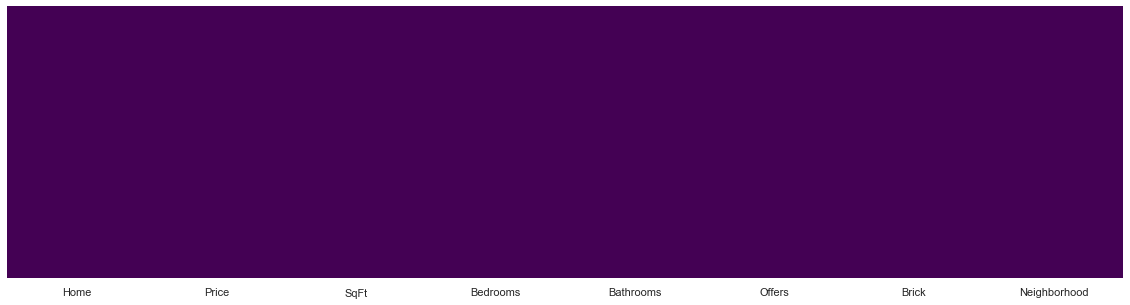

In [14]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Handlign missing values (Imputation of Missing values)

In [15]:
def miss_values(x):
    if x.dtype=='O':
        x=x.fillna(x.mode()[0])
        return x
    else:
        x=x.fillna(x.median())
        return x

In [16]:
df= df.apply(miss_values)

In [17]:
df.isna().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [19]:
df.head(5)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [20]:
df.Neighborhood.value_counts()

East     45
North    44
West     39
Name: Neighborhood, dtype: int64

In [21]:
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [22]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [23]:
df.describe(include=object)

,Brick,Neighborhood
count,128,128
unique,2,3
top,No,East
freq,86,45


# Understand Distribution of data  

### Histogram/Boxplot for continuous

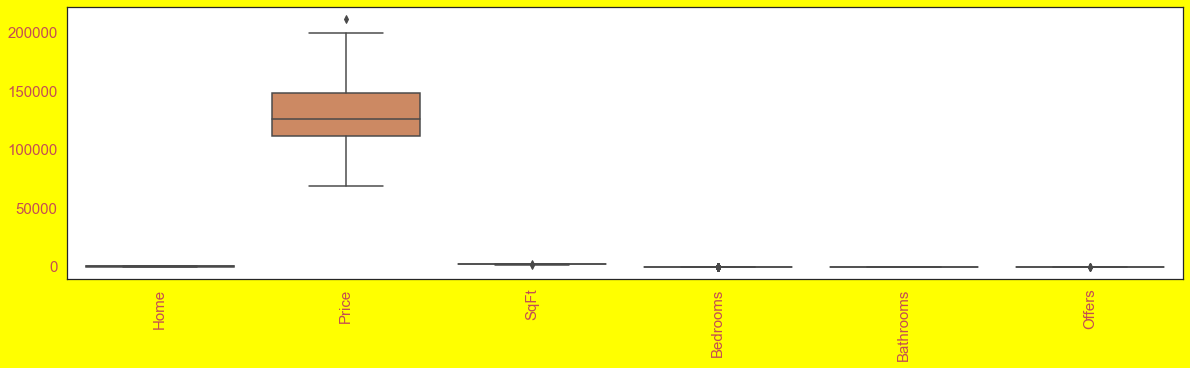

In [24]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.select_dtypes(include=[int,float]))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

### Understand Relationships (correlations/associations) 

In [25]:
df.columns.difference(['Price'])

Index(['Bathrooms', 'Bedrooms', 'Brick', 'Home', 'Neighborhood', 'Offers',
       'SqFt'],
      dtype='object')

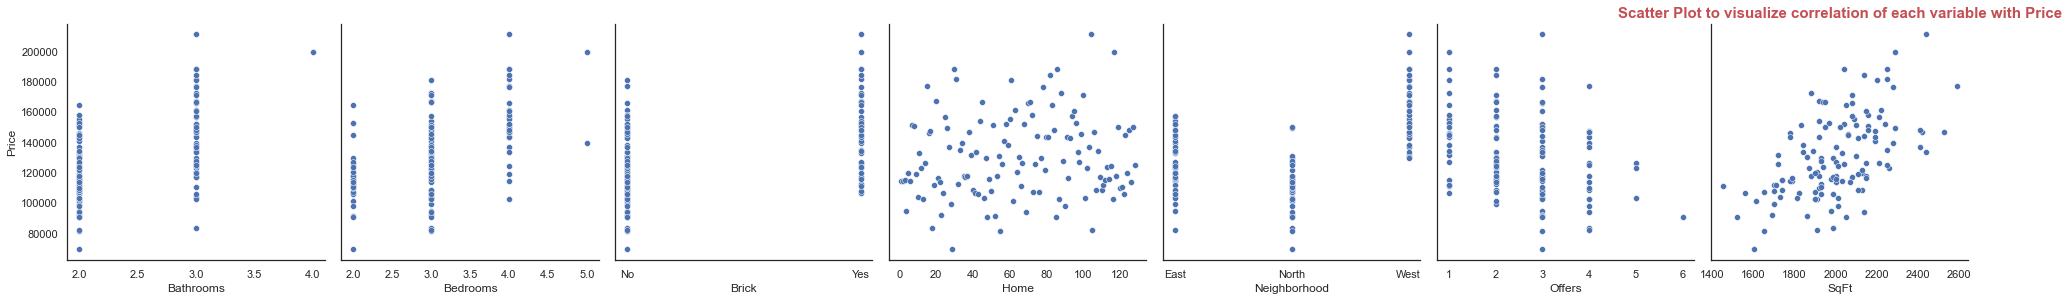

In [26]:
sns.pairplot(df, x_vars=df.columns.difference(['Price']), y_vars='Price',size=4,height=10, aspect=1, kind='scatter')
plt.title('Scatter Plot to visualize correlation of each variable with Price',fontsize=15,color='r',fontweight='bold')
plt.show()

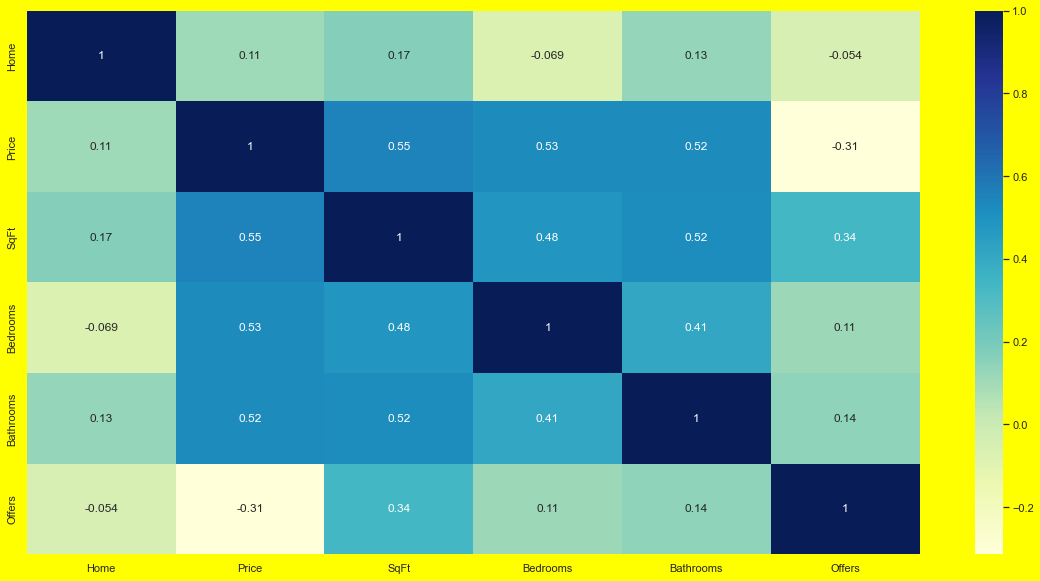

In [27]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [28]:
report_1 = pf.ProfileReport(df)

In [29]:
report_1.to_file("report_1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
df =df.drop(columns=['Home'],axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         128 non-null    int64 
 1   SqFt          128 non-null    int64 
 2   Bedrooms      128 non-null    int64 
 3   Bathrooms     128 non-null    int64 
 4   Offers        128 non-null    int64 
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB


# Step 2: Model Building Steps - Modeling Stage

### Handling Outliers--Cross sectional data

In [32]:
def outliers(x):
    if ((x.dtype=='int')| (x.dtype=='float')):
        x=x.clip(lower=quantile(0.05),upper=quantile(0.95))                                      
    else :
        x
    return x

In [33]:
df=df.apply(outliers)
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,Yes,East
124,147900,2160,4,3,3,Yes,East
125,113500,2070,2,2,2,No,North
126,149900,2020,3,3,1,No,West


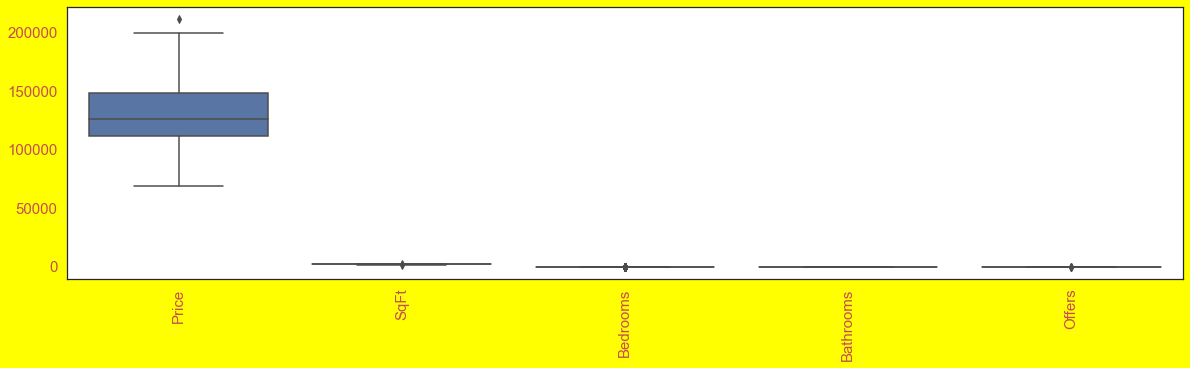

In [34]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.select_dtypes(include=[int,float]))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

In [35]:
print(df.Price.quantile(0.01))
print(df.Price.min())
print(df.Price.quantile(0.99))
print(df.Price.max())

81570.0
69100
196476.00000000006
211200


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         128 non-null    int64 
 1   SqFt          128 non-null    int64 
 2   Bedrooms      128 non-null    int64 
 3   Bathrooms     128 non-null    int64 
 4   Offers        128 non-null    int64 
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB


### Converting categorical variables into numercal variables--- Ordinal variables (Label encoding)

In [37]:
for var in df.select_dtypes(include='object').columns:
     print("\n" + var)
     print(df[var].value_counts())


Brick
No     86
Yes    42
Name: Brick, dtype: int64

Neighborhood
East     45
North    44
West     39
Name: Neighborhood, dtype: int64


 ###  converting categorical into numerical

In [38]:
df1= pd.get_dummies(df,columns=['Brick','Neighborhood'],drop_first=True)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Price               128 non-null    int64
 1   SqFt                128 non-null    int64
 2   Bedrooms            128 non-null    int64
 3   Bathrooms           128 non-null    int64
 4   Offers              128 non-null    int64
 5   Brick_Yes           128 non-null    uint8
 6   Neighborhood_North  128 non-null    uint8
 7   Neighborhood_West   128 non-null    uint8
dtypes: int64(5), uint8(3)
memory usage: 5.5 KB


### Assumptions of the techniques--Normality/Linearity/No outliers/No Multicollinieirty/Homoscedasticity

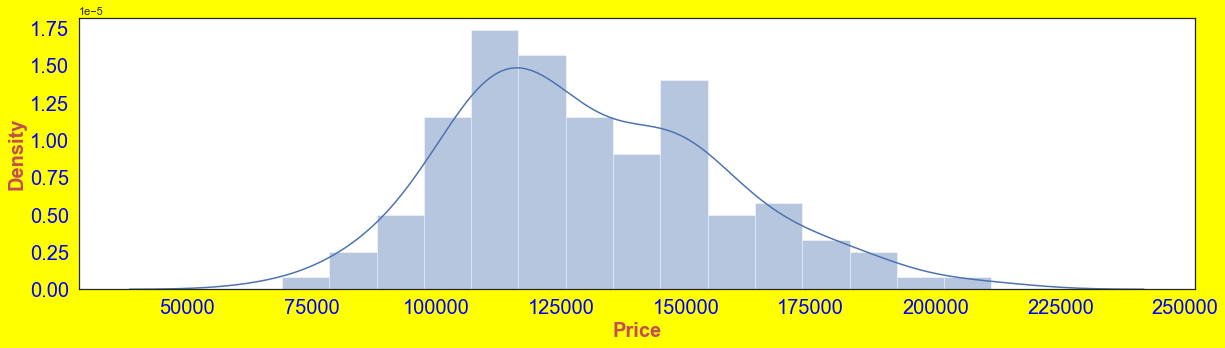

In [40]:

plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white') # distribution graph  and its a combination  pdf and histogram combination
sns.distplot(df1.Price,bins=15)        
plt.ylabel('Density',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Price',fontsize=20,color='r',fontweight='bold')# X-label
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=20,color='blue')
plt.show()# left skewness

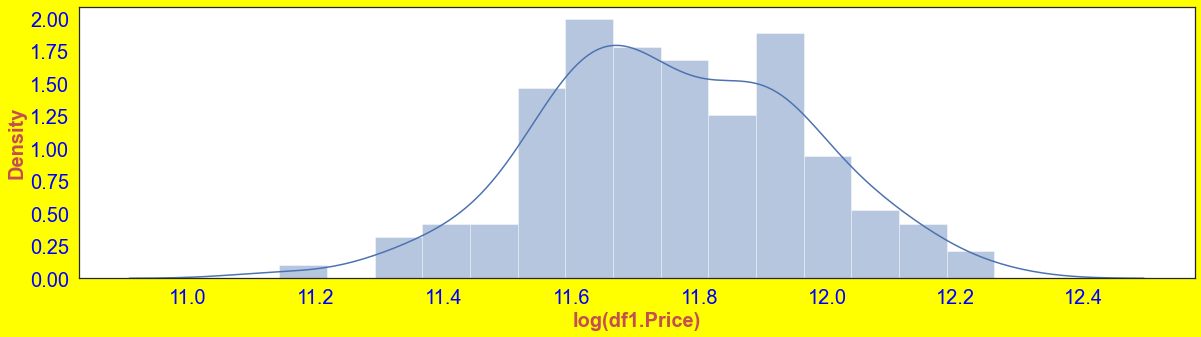

In [41]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white') # distribution graph  and its a combination  pdf and histogram combination
sns.distplot(np.log(df1.Price),bins=15)      
plt.ylabel('Density',fontsize=20,color='r',fontweight='bold')
plt.xlabel('log(df1.Price)',fontsize=20,color='r',fontweight='bold')# X-label
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=20,color='blue')
plt.show()

In [42]:
df1['lnPrice'] = np.log(df1.Price)

In [43]:
df1=df1.drop('Price',axis=1)

In [44]:
df1

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West,lnPrice
0,1790,2,2,2,0,0,0,11.646582
1,2030,4,2,3,0,0,0,11.645707
2,1740,3,2,1,0,0,0,11.650947
3,1980,3,2,3,0,0,0,11.458469
4,2130,3,3,3,0,0,0,11.693579
...,...,...,...,...,...,...,...,...
123,1900,3,3,3,1,0,0,11.692744
124,2160,4,3,3,1,0,0,11.904292
125,2070,2,2,2,0,1,0,11.639558
126,2020,3,3,1,0,0,1,11.917724


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SqFt                128 non-null    int64  
 1   Bedrooms            128 non-null    int64  
 2   Bathrooms           128 non-null    int64  
 3   Offers              128 non-null    int64  
 4   Brick_Yes           128 non-null    uint8  
 5   Neighborhood_North  128 non-null    uint8  
 6   Neighborhood_West   128 non-null    uint8  
 7   lnPrice             128 non-null    float64
dtypes: float64(1), int64(4), uint8(3)
memory usage: 5.5 KB


### Feature engineering

- Based on the data, you may drop variables based on below reasons
    - If the variable have lots of missings (>25%)
    - if categorical Variable with lots categories(>20)
    - Variable with near zero variance (CV<0.05)
    - Unique variables/Keys/Names/Emaiid/Phone number

### Checking Linearity

In [46]:
corre_y = df1.corrwith(df1.lnPrice)

In [47]:
corre_y.to_csv('corre_y.csv')

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SqFt                128 non-null    int64  
 1   Bedrooms            128 non-null    int64  
 2   Bathrooms           128 non-null    int64  
 3   Offers              128 non-null    int64  
 4   Brick_Yes           128 non-null    uint8  
 5   Neighborhood_North  128 non-null    uint8  
 6   Neighborhood_West   128 non-null    uint8  
 7   lnPrice             128 non-null    float64
dtypes: float64(1), int64(4), uint8(3)
memory usage: 5.5 KB


In [49]:
df1.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West', 'lnPrice'],
      dtype='object')

In [50]:
df1=df1[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes','Neighborhood_North', 'Neighborhood_West', 'lnPrice']]

In [51]:
cv= df1.apply(lambda x:np.std(x)/np.mean(x))
cv

SqFt                  0.105323
Bedrooms              0.239168
Bathrooms             0.209576
Offers                0.413145
Brick_Yes             1.430950
Neighborhood_North    1.381699
Neighborhood_West     1.510646
lnPrice               0.017440
dtype: float64

### Multicolinieity by VIF

In [52]:
df2 = df1[df1.columns.difference(['lnPrice','SqFt','Bathrooms','Bedrooms'])]

In [53]:
df2.values # data frame to arrays

array([[0, 0, 0, 2],
       [0, 0, 0, 3],
       [0, 0, 0, 1],
       [0, 0, 0, 3],
       [0, 0, 0, 3],
       [0, 1, 0, 2],
       [1, 0, 1, 3],
       [0, 0, 1, 2],
       [0, 0, 0, 3],
       [0, 0, 0, 3],
       [1, 0, 0, 3],
       [1, 0, 0, 2],
       [0, 1, 0, 4],
       [1, 1, 0, 5],
       [0, 0, 1, 4],
       [0, 0, 1, 1],
       [1, 0, 0, 4],
       [0, 1, 0, 4],
       [1, 0, 0, 1],
       [1, 0, 1, 2],
       [0, 0, 0, 3],
       [0, 1, 0, 4],
       [0, 1, 0, 3],
       [1, 1, 0, 3],
       [1, 0, 0, 2],
       [0, 1, 0, 3],
       [0, 0, 1, 3],
       [0, 0, 0, 2],
       [0, 1, 0, 3],
       [1, 0, 1, 1],
       [1, 0, 1, 3],
       [1, 1, 0, 2],
       [1, 0, 0, 3],
       [1, 0, 0, 4],
       [0, 1, 0, 3],
       [0, 1, 0, 3],
       [0, 1, 0, 2],
       [0, 0, 1, 4],
       [0, 0, 1, 1],
       [0, 1, 0, 2],
       [0, 0, 0, 1],
       [0, 0, 1, 2],
       [0, 0, 0, 3],
       [1, 0, 0, 1],
       [1, 0, 1, 2],
       [0, 0, 0, 3],
       [0, 1, 0, 2],
       [0, 1,

In [54]:
v1= pd.Series(df2.columns,name='variables')
v1

0             Brick_Yes
1    Neighborhood_North
2     Neighborhood_West
3                Offers
Name: variables, dtype: object

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
v2 = pd.Series([variance_inflation_factor(df2.values,i) for i in range(0,df2.shape[1])],name='vif')
v2   

0    1.421890
1    2.034330
2    1.440907
3    2.770734
Name: vif, dtype: float64

In [57]:
vif_values= pd.concat([v1,v2],axis=1)
vif_values

,variables,vif
0,Brick_Yes,1.421890
1,Neighborhood_North,2.034330
2,Neighborhood_West,1.440907
3,Offers,2.770734


In [58]:
vif_values= vif_values.sort_values(by='vif',ascending=False)
vif_values

,variables,vif
3,Offers,2.770734
1,Neighborhood_North,2.034330
2,Neighborhood_West,1.440907
0,Brick_Yes,1.421890


In [59]:
vif = pd.DataFrame()
vif['Features'] = df2.columns
vif['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Offers,2.77
1,Neighborhood_North,2.03
2,Neighborhood_West,1.44
0,Brick_Yes,1.42


In [60]:
df_final=df1[df1.columns.difference(['SqFt','Bathrooms','Bedrooms'])]
df_final

,Brick_Yes,Neighborhood_North,Neighborhood_West,Offers,lnPrice
0,0,0,0,2,11.646582
1,0,0,0,3,11.645707
2,0,0,0,1,11.650947
3,0,0,0,3,11.458469
4,0,0,0,3,11.693579
...,...,...,...,...,...
123,1,0,0,3,11.692744
124,1,0,0,3,11.904292
125,0,1,0,2,11.639558
126,0,0,1,1,11.917724


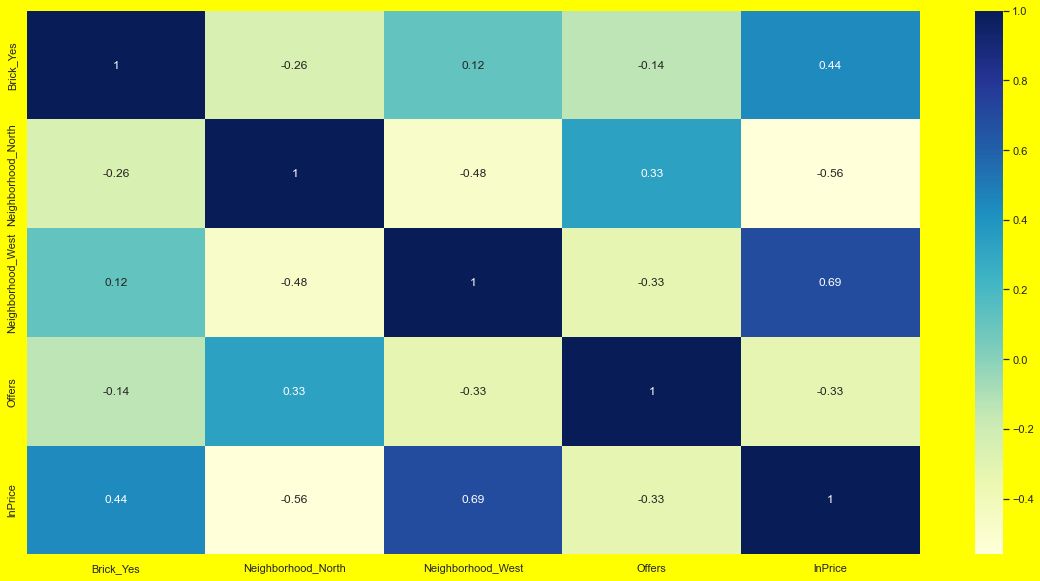

In [61]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
sns.heatmap(df_final.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Step 3: Performing Simple Linear Regression

⚫Equation of Multivariate linear regression

⚫y=m1*x1 + m2*x2 + ... + mn*xn+C

⚫c is the intercept

⚫m1 is the coefficient for the first feature

⚫mn is the coefficient for the nth feature
 
⚫In our case:
The m values are :
    The model coefficients
    Betas
    Estimates
    Gradients
    Slopes 
    parameters.
    
The X values are  :     
    Independent variables
    X variables
    Variables
    Features
    Explnatory variables
    Regressors
    drivers
    
The Y values are :
    Dependent variable
    Y variable
    Explained variable
    response variable
    Target variable
    Object variable

### Steps in model building using statsmodels

###  Splitting the data into train & Test

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
y=target = df_final[['lnPrice']]
X=features =df_final[df_final.columns.difference(['lnPrice','Offers'])]

####  Splitting the data for sklearn methods

In [64]:
train_X, test_X, train_y, test_y= train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [65]:
train_X.head(5)

,Brick_Yes,Neighborhood_North,Neighborhood_West
70,1,0,1
23,1,1,0
120,0,1,0
110,0,1,0
20,0,0,0


In [66]:
train_y.head(5)

,lnPrice
70,12.023951
23,11.572137
120,11.611865
110,11.622676
20,11.663068


In [67]:
import statsmodels.api as sm

####  Adding a constant to get an intercept

In order to have an intercept, we manually used the add_constant attribute from statsmodels.api
Once we have added constant to train_X dataset, we can go ahead and fit a regression line using the OLS (Ordinary Least Squares)

In [68]:
train_X_wc=sm.add_constant(train_X)
train_X_wc.head(5)

,const,Brick_Yes,Neighborhood_North,Neighborhood_West
70,1.0,1,0,1
23,1.0,1,1,0
120,1.0,0,1,0
110,1.0,0,1,0
20,1.0,0,0,0


In [69]:
test_X_wc=sm.add_constant(test_X)
test_X_wc.head(5)

,const,Brick_Yes,Neighborhood_North,Neighborhood_West
11,1.0,1,0,0
106,1.0,0,1,0
105,1.0,0,0,1
73,1.0,0,0,0
92,1.0,0,0,1


In [70]:
train_y.head(5)

,lnPrice
70,12.023951
23,11.572137
120,11.611865
110,11.622676
20,11.663068


####  Fit the resgression line using 'OLS'

In [71]:
ols_model= sm.OLS(train_y, train_X_wc).fit()

#### Performing a summary operation lists out all the different parameters of the regression line fitted

In [72]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                lnPrice   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     56.81
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           3.00e-20
Time:                        17:36:51   Log-Likelihood:                 66.095
No. Observations:                  89   AIC:                            -124.2
Df Residuals:                      85   BIC:                            -114.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.6853      0

#### Printing the parameters, i.e. the intercept and the slope of the regression line fitted

In [73]:
ols_model.params

const                 11.685286
Brick_Yes              0.114906
Neighborhood_North    -0.101250
Neighborhood_West      0.247500
dtype: float64

# Step 4: Residual analysis

Linear Regression					

	- variable significance			looking at P-Value	
	- final mathematical equation				
	- Important Drivers (positive/negative)				
	- Check the drivers signs with orignal correlations with Y				
    
	Metrics				
		R-square/Adj Square			
		MSE/RMSE/MAPE/RMSPE			
		Corr(Actual, pred)			
		Decile Analysis (Rank Ordering)			
        
	Checks				
		Errors should follow normal distribution			
		Corr(Actual, Errors) ~0			
		no multicollineirity on final list of variables		

###  Distribution of the error terms

We need to check if the error terms are also normally distributed 
(which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [74]:
y_train_pred = (ols_model.predict(train_X_wc))
y_test_pred = (ols_model.predict(test_X_wc))
y_train_act = (train_y.lnPrice)
y_test_act = (test_y.lnPrice) 

In [75]:
Error=y_train_act - y_train_pred

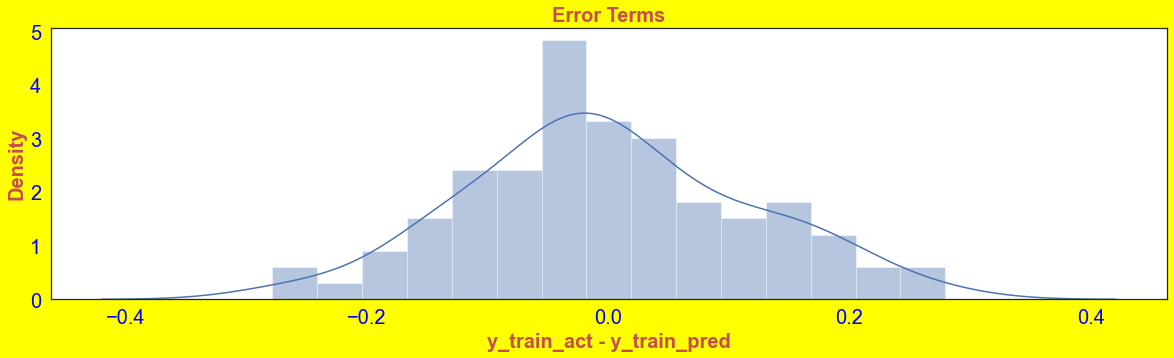

In [76]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white') # distribution graph  and its a combination  pdf and histogram combination
sns.distplot(Error, bins = 15)
plt.title('Error Terms',fontsize=20,color='r',fontweight='bold')  # Plot heading           
plt.ylabel('Density',fontsize=20,color='r',fontweight='bold')
plt.xlabel('y_train_act - y_train_pred',fontsize=20,color='r',fontweight='bold')# X-label
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=20,color='blue')
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

# Step 5: Predictions on the Test Set

### Now that we have fitted a regression line on our train dataset, we can make some predictions on the test data

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

### Looking at the RMSE

##### Returns the mean squared error then apply  a square root

In [78]:
print('Train_RMSE' ,np.sqrt(mean_squared_error(y_train_act, y_train_pred)))
print('Test_RMSE' ,np.sqrt(mean_squared_error(y_test_act, y_test_pred)))

Train_RMSE 0.11514269732929142
Test_RMSE 0.14095147601075


### Checking the R-squared

In [79]:
Train_r_squared=r2_score(y_train_act, y_train_pred)
Test_r_squared=r2_score(y_test_act, y_test_pred)
print('Train_R2',Train_r_squared)
print('Test R2',Test_r_squared)

Train_R2 0.6672148465077723
Test R2 0.5731865811147826


#### R-squared of the Test set is pretty close to the predicted model. Thus the model is a good fit.

### Checking the Correlation 

In [80]:
print('Train_corr:', np.corrcoef(y_train_act, y_train_pred)[1][0])
print('Test_corr:', np.corrcoef(y_test_act, y_test_pred)[1][0])

Train_corr: 0.8168322021735998
Test_corr: 0.7628493959243285


### Checking The MAPE

In [81]:
Train_Mean_absolute_percentage_error=r2_score(y_train_act, y_train_pred)
Test_Mean_absolute_percentage_error=r2_score(y_test_act, y_test_pred)
print('Train_MAPE',Train_Mean_absolute_percentage_error)
print('Test_MAPE',Test_Mean_absolute_percentage_error)

Train_MAPE 0.6672148465077723
Test_MAPE 0.5731865811147826


In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
Scaler=StandardScaler()

In [84]:
Standard_Train_x=pd.DataFrame(Scaler.fit_transform(train_X),columns=train_X.columns)
Standard_Test_x=pd.DataFrame(Scaler.fit_transform(test_X),columns=train_X.columns)

In [85]:
Standard_Train_x.head()

,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1.402379,-0.695222,1.515354
1,1.402379,1.438390,-0.659912
2,-0.713074,1.438390,-0.659912
3,-0.713074,1.438390,-0.659912
4,-0.713074,-0.695222,-0.659912


In [86]:
import statsmodels.api as sm

In [87]:
Standard_Train_x=sm.add_constant(Standard_Train_x)
Standard_Train_x.head(5)

,const,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1.0,1.402379,-0.695222,1.515354
1,1.0,1.402379,1.438390,-0.659912
2,1.0,-0.713074,1.438390,-0.659912
3,1.0,-0.713074,1.438390,-0.659912
4,1.0,-0.713074,-0.695222,-0.659912


In [88]:
Standard_Train_y=pd.DataFrame(Scaler.fit_transform(train_y),columns=train_y.columns)
Standard_Test_y=pd.DataFrame(Scaler.fit_transform(test_y),columns=train_y.columns)

In [89]:
Standard_Test_x=sm.add_constant(Standard_Test_x)
Standard_Test_x.head(5)

,const,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1.0,1.500000,-0.790569,-0.666667
1,1.0,-0.666667,1.264911,-0.666667
2,1.0,-0.666667,-0.790569,1.500000
3,1.0,-0.666667,-0.790569,-0.666667
4,1.0,-0.666667,-0.790569,1.500000


In [90]:
ols_model= sm.OLS(Standard_Train_y, Standard_Train_x).fit()

In [91]:
ols_model.params

const                -1.523207e-14
Brick_Yes             2.721362e-01
Neighborhood_North   -2.377536e-01
Neighborhood_West     5.700449e-01
dtype: float64

We notice that the value of the parameters have changed since we have changed the scale.

Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [92]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                lnPrice   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     56.81
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           3.00e-20
Time:                        17:36:52   Log-Likelihood:                -77.324
No. Observations:                  89   AIC:                             162.6
Df Residuals:                      85   BIC:                             172.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.523e-14      0

#### Model statistics and goodness of fit remain unchanged.
#### General reasons for scaling -
#### Helps with interpretation
#### Faster convergence of gradient descent